# CS412- MELİH ÇAĞAN ARI - HOMEWORK_3

## STEP-1: Load the dataset and preprocess the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading my dataset and split into features X and labels y
titanic_df = pd.read_csv('/content/titanicdata.csv')
X = titanic_df[['Pclass', 'Sex', 'Age']]  # Features: age, sex, pclass
y = titanic_df['Survived']  # Target variable: survival (0 or 1)

# Set random seed
np.random.seed(42)

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## STEP-2: Implementing the logistic regression model


In [2]:
def sigmoid(z): # sigmoid function mapping input values to a value between 0 and 1
    return 1 / (1 + np.exp(-z))

def initialize_parameters(dim): # initializing "w" value through this function
    w = np.zeros((dim,))  # Initialize as 1D array instead of 2D
    return w

def compute_cost(X, y, w): # function that computes the difference
    m = len(y)             #or distance between actual output and predicted output
    z = np.dot(X, w)
    h = sigmoid(z)
    cost = -1/m * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, w, learning_rate, num_iterations): #to find the values of a function's parameters
    m = len(y)                                                #that minimize a cost function as far as possible
    costs = []

    for i in range(num_iterations):
        z = np.dot(X, w)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        w -= learning_rate * gradient
        cost = compute_cost(X, y, w)
        costs.append(cost)

    return w, costs


## STEP-3: Training my model using the training data

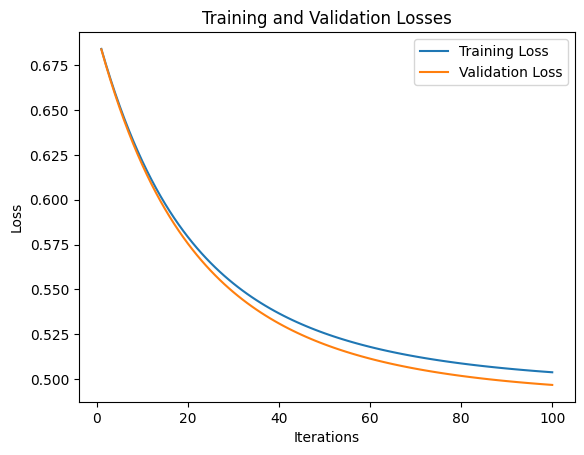

In [3]:
# Initialize parameters
w = initialize_parameters(X_train_scaled.shape[1])

# Initializing lists to store losses
train_losses = []
val_losses = []

# Training the model
learning_rate = 0.1
num_iterations = 100

for i in range(num_iterations):
    # Performing gradient descent
    w, _ = gradient_descent(X_train_scaled, y_train, w, learning_rate, 1)

    # Calculating losses
    train_loss = compute_cost(X_train_scaled, y_train, w)
    val_loss = compute_cost(X_val_scaled, y_val, w)

    # Appending losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plotting the losses
plt.plot(range(1, num_iterations + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_iterations + 1), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


## STEP-4:  Plotting the loss curve across different iterations for the chosen values of these hyperparameters.


In [4]:
# Defining a grid of hyperparameters
step_sizes = [0.01, 0.05, 0.1, 0.5]  # Varying step sizes
num_iterations_list = [50, 100, 150, 200]  # Varying numbers of iterations

best_loss = float('inf')
best_hyperparams = None
best_w = None
best_val_losses = None

for step_size in step_sizes:
    for num_iterations in num_iterations_list:
        # Initializing parameter "weights"
        w = initialize_parameters(X_train_scaled.shape[1])

        # Training the model
        w_trained, _ = gradient_descent(X_train_scaled, y_train, w, step_size, num_iterations)

        # Calculating validation loss
        val_loss = compute_cost(X_val_scaled, y_val, w_trained)

        # Storing the best hyperparameters and model parameters
        if val_loss < best_loss:
            best_loss = val_loss
            best_hyperparams = (step_size, num_iterations)
            best_w = w_trained
            best_val_losses = _

# Plotting loss curve for the chosen hyperparameters
plt.plot(range(1, best_hyperparams[1] + 1), best_val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Loss Curve (Best Hyperparameters)')
plt.legend()
plt.show()

print("Best Hyperparameters (Step Size, Number of Iterations):", best_hyperparams)
print("Best Validation Loss:", best_loss)


Best Hyperparameters (Step Size, Number of Iterations): (0.5, 50)
Best Validation Loss: 0.4904990902343711


## STEP-5: Combining the validation and training data and retrain the final model with the chosen hyperparameters.

In [5]:
# Combining training and validation data
X_train_val_combined = np.vstack((X_train_scaled, X_val_scaled))
y_train_val_combined = np.concatenate((y_train, y_val))

# Retraining the final model with the chosen hyperparameters
final_w, _ = gradient_descent(X_train_val_combined, y_train_val_combined, best_w, best_hyperparams[0], best_hyperparams[1])


## STEP-6: Evaluate the accuracy of your model on the testing data

In [6]:
# a function to predict the class labels
def predict(X, w):
    z = np.dot(X, w)
    y_pred = np.round(sigmoid(z)).astype(int)
    return y_pred

# Predicting on the testing data
y_pred_test = predict(X_test_scaled, final_w)

# Calculating accuracy of my model
accuracy = np.mean(y_pred_test == y_test)

print("Accuracy on testing data:", accuracy)


Accuracy on testing data: 0.8100558659217877
